In [1]:
from counting_sort import counting_sort
from aru_counting_sort import aru_counting_sort
import time

In [2]:
lst = [10000000,1,2,100, 1000]

start = time.time()
res = counting_sort(lst)
end = time.time()
print("Counting sort result: ", res)
print("Counting sort execution time: ", end-start)

start = time.time()
res = aru_counting_sort(lst)
end = time.time()
print("ARU counting sort result: ", res)
print("ARU counting sort execution time: ", end-start)

Counting sort result:  [1, 2, 100, 1000, 10000000]
Counting sort execution time:  4.859227895736694
ARU counting sort result:  [1, 2, 100, 1000, 10000000]
ARU counting sort execution time:  0.0040132999420166016


In [3]:
def get_exec_time_counting_sort(lst):
    start = time.time()
    counting_sort(lst)
    end = time.time()
    return end - start

def get_exec_time_aru_counting_sort(lst):
    start = time.time()
    aru_counting_sort(lst)
    end = time.time()
    return end - start

In [4]:
#source: https://www.geeksforgeeks.org/quick-sort/
def partition(arr, low, high):
    i = (low-1)         # index of smaller element
    pivot = arr[high]     # pivot

    for j in range(low, high):

        # If current element is smaller than or
        # equal to pivot
        if arr[j] <= pivot:

            # increment index of smaller element
            i = i+1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i+1], arr[high] = arr[high], arr[i+1]
    return (i+1)


def quickSort(arr, low, high):
    if len(arr) == 1:
        return arr
    if low < high:

        # pi is partitioning index, arr[p] is now
        # at right place
        pi = partition(arr, low, high)

        # Separately sort elements before
        # partition and after partition
        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)


def get_exec_time_quick_sort(lst):
    n = len(lst)
    start = time.time()
    quickSort(lst, 0, n-1)
    end = time.time()
    return end - start

In [5]:
import numpy as np
lst = np.random.randint(low=1, high=10, size=1000)

counting_time_lst = []
aru_counting_time_lst = []
quick_sort_time_lst = []
x=[10**x for x in range(1, 8)]

for i in range(len(x)):
    lstc = lst.copy()
    lstc[-1] = x[i]
    counting_time_lst.append(get_exec_time_counting_sort(lstc))
    aru_counting_time_lst.append(get_exec_time_aru_counting_sort(lstc))

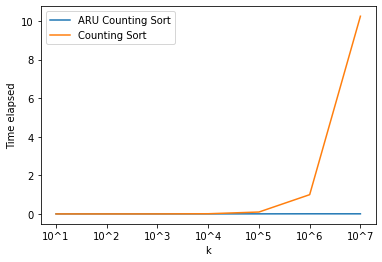

In [6]:
import matplotlib.pyplot as plt

xplt = [i for i in range(1, len(x)+1)]
plt.plot(xplt, aru_counting_time_lst)
plt.plot(xplt, counting_time_lst)
plt.xlabel('k')
plt.ylabel('Time elapsed')
labels = [f"10^{x}" for x in range(1, len(x)+1)]
plt.xticks(xplt, labels)
plt.legend(['ARU Counting Sort', 'Counting Sort'])

plt.savefig('aru_and_count_comparison.png')
plt.show()

In [7]:
import numpy as np
lst = np.random.randint(low=1, high=10, size=100)

aru_counting_time_lst = []
quick_sort_time_lst = []
x=[10**x for x in range(1, 10)]

for i in range(len(x)):
    lstc = lst.copy()
    lstc[-1] = x[i]
    np.random.shuffle(lstc)
    aru_counting_time_lst.append(get_exec_time_aru_counting_sort(lstc))
    quick_sort_time_lst.append(get_exec_time_quick_sort(lstc))

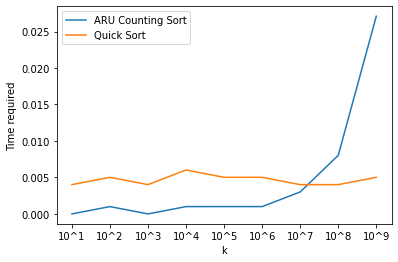

In [8]:
import matplotlib.pyplot as plt

xplt = [i for i in range(1, len(x)+1)]
plt.plot(xplt, aru_counting_time_lst)
plt.plot(xplt, quick_sort_time_lst)
plt.xlabel('k')
plt.ylabel('Time required')
labels = [f"10^{x}" for x in range(1, len(x)+1)]
plt.xticks(xplt, labels)
plt.legend(['ARU Counting Sort', 'Quick Sort'])

plt.savefig('aru_and_quick_comparison.png')
plt.show()